In [9]:
import pandas as pd
from binance.client import Client
from datetime import datetime, timedelta
import time

# Binance API anahtarlarınızı burada tanımlayın
api_key = 'hJmrpmh9tnr0VjDHT9I7ABZhMgIb8ncY45X1nB3p4jat8xqID5AwoSII4axasKZD'
api_secret = 'Z2TgzJbqPXjrJWSz7TKcvq4JKKnOswSPM5yY0RCURCCuMRtlVir8OpPnwNcFJ6dv'

# Binance Client'ı oluşturun
client = Client(api_key, api_secret)

symbol = "BTCUSDT"
start_date = "2023-03-01"
end_date = "2023-09-01"
interval = Client.KLINE_INTERVAL_15MINUTE

# Veriyi saklamak için bir liste oluşturun
data = []
limit = 10000  # Her bir istekte çekilecek maksimum veri sayısı
request_weight = 0  # İstek ağırlığı

# Başlangıç ve bitiş tarihlerini datetime formatına çevirin
start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d")

# İstekler aracılığıyla veriyi çekin
while start_datetime < end_datetime and request_weight < 1200:
    klines = client.get_historical_klines(symbol=symbol, interval=interval, start_str=start_datetime.strftime("%Y-%m-%d %H:%M:%S"), end_str=end_datetime.strftime("%Y-%m-%d %H:%M:%S"))
    if not klines:
        break
    data.extend(klines)
    
    # İstek ağırlığını güncelle (her bir istek 1 ağırlık)
    request_weight += 1
    
    # Bir sonraki isteği yapmadan önce başlangıç zamanını güncelle
    start_datetime = datetime.utcfromtimestamp(klines[-1][0] / 1000) + timedelta(seconds=1)

    # API sınırlamalarını göz önünde bulundurarak bekleyin (gerekirse)
    if request_weight >= 1190:
        time.sleep(60)  # 60 saniye bekleyin (1 dakika)

# DataFrame'i oluşturun
df = pd.DataFrame(data, columns=["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"])

# Zaman sütununu datetime olarak dönüştürün
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Diğer sayısal verileri floata dönüştürün
df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']] = df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']].astype(float)


In [10]:
df

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,2676.35187,1677629699999,6.195313e+07,106496,1359.29723,3.146608e+07,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,2327.36073,1677630599999,5.396533e+07,85498,1186.44460,2.751063e+07,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,2304.89283,1677631499999,5.343452e+07,90021,1067.83235,2.475616e+07,0
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,5428.34375,1677632399999,1.252558e+08,148178,2705.62578,6.242877e+07,0
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,3068.10426,1677633299999,7.093708e+07,105631,1591.94490,3.680739e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09,194.11965,1693523699999,5.052239e+06,5153,79.30930,2.064098e+06,0
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11,251.29895,1693524599999,6.530555e+06,6013,79.10420,2.055704e+06,0
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24,245.21169,1693525499999,6.367552e+06,5116,126.90147,3.295108e+06,0
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78,366.66576,1693526399999,9.512836e+06,7511,174.14839,4.518030e+06,0


In [11]:
import pandas as pd
from datetime import datetime, timedelta

# For example, start and end dates
start_date = "2023-03-01"
end_date = "2023-09-01"

# Time interval: 15 minutes (900 seconds)
interval_seconds = 900

# Convert start and end dates to datetime objects
start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d")

# Calculate the expected number of data points
expected_data_points = int((end_datetime - start_datetime).total_seconds() / interval_seconds) + 1

# Real data points (rows): Let's assume it's the number of rows in your DataFrame named 'df'
# Replace 'df' with the name of your actual DataFrame
real_data_points = len(df)

# Compare expected and real data points
if expected_data_points == real_data_points:
    print("The time series has no gaps or irregularities.")
    print(f"Expected data points: {expected_data_points}")
    print(f"Real data points: {real_data_points}")
else:
    print("There are gaps or irregularities in the time series.")
    print(f"Expected data points: {expected_data_points}")
    print(f"Real data points: {real_data_points}")

There are gaps or irregularities in the time series.
Expected data points: 17665
Real data points: 17660


In [12]:
# DataFrame'e dönüştürün
df = pd.DataFrame(data, columns=[
    "timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", 
    "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])

# Zaman sütununu datetime olarak dönüştürün
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Diğer sayısal verileri floata dönüştürün
df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']] = df[['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']].astype(float)

# İstenen sütunları seçin
selected_columns = ["timestamp", "open", "high", "low", "close"]

df = df[selected_columns]

df

,timestamp,open,high,low,close
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84
...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78


In [13]:
df.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
dtype: object

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,17660.0,27829.173008,2252.760942,19622.77,26709.4125,28021.955,29451.1725,31672.95
high,17660.0,27865.525972,2250.049671,19687.73,26741.9100,28062.940,29473.7900,31804.20
low,17660.0,27790.953696,2254.880951,19549.09,26670.0225,27978.460,29431.5300,31632.00
close,17660.0,27829.335063,2252.526590,19621.66,26709.4100,28021.955,29451.1775,31672.95


In [15]:
print('If we are going to use close column for model traning, model is going to be worked better as long as price is between {:.0f}/{:.0f}'.format(df.low.min(), df.high.max()))

If we are going to use close column for model traning, model is going to be worked better as long as price is between 19549/31804


## Project Steps

### 1. Describe the problem

The purpose is producing **bull/bear signal**, so out target column must be that.

**Bull Signal:** _If a purchase increases by 1% without decreasing by 0.5% from where we bought it in subsequent time frames, it is a bull signal for that time frame._

**Bear Signal:** _If a purchase decrases 1% without increasing by 0.5% from where we bought it in subsequent time frames, it is a bear signal for that time frame._


In [16]:
df

,timestamp,open,high,low,close
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84
...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78


In [17]:
def perc_check_more(x):
    return (x + (x * 0.0025)) 
def perc_confirmed_more(x):
    return (x + (x * 0.005))

def perc_check_less(x):
    return (x - (x * 0.0025)) 
def perc_confirmed_less(x):
    return (x - (x * 0.005)) 

df['Sell'] = 0
df['Stable'] = 0
df['Buy'] = 0

In [18]:
df

,timestamp,open,high,low,close,Sell,Stable,Buy
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,0,0,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,0,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,0
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,0
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,0
...,...,...,...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09,0,0,0
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11,0,0,0
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24,0,0,0
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78,0,0,0


In [19]:
for ci in range(df.shape[0]):
    try: 
        more_check = perc_check_more(df.iloc[ci, 4]) 
        more_confirmed = perc_confirmed_more(df.iloc[ci, 4]) 
        
        less_check = perc_check_less(df.iloc[ci, 4])
        less_confirmed = perc_confirmed_less(df.iloc[ci, 4])

        # print('Close itself: ', df.iloc[ci, 4])
        # print('Less 0.005: ', less0005)
        # print('More 0.005: ', more0005)

        try: 
            for fci in range(ci+1, df.shape[0]-15):
                # check = True
                # print(f'Step: {step}' )
                # print('df.iloc[fci, 4]: ', df.iloc[fci, 4])

                if df.iloc[fci, 4] < less_check: 
                    # print(df.iloc[fci, 4])
                    # print('hey df.iloc[fci, 4] < less0005')
                    try:
                        for lessfci in range(fci+1, fci+15):
                            if df.iloc[lessfci, 4] < less_confirmed: 
                                df.iloc[ci, 5] = 1 #bear
                                # check = False
                                break
                            elif df.iloc[lessfci, 4] > df.iloc[ci, 4]: 
                                df.iloc[ci, 6] = 1 #volatile
                                # check = False
                                break   
                        # if check: df.iloc[ci, 6] = 1 #volitile
                        break

                    except IndexError: 
                        print(f'\nci: {ci}\n THIRTH LOOP (lessfci): Index Error')
                        break

                if df.iloc[fci, 4] > more_check:
                    # print('hey df.iloc[fci, 4] < more0005') 
                    try:
                        for morefci in range(fci+1, fci+15):
                            if df.iloc[morefci, 4] > more_confirmed: 
                                df.iloc[ci, 7] = 1 #bull
                                # check = False
                                break
                            elif df.iloc[morefci, 4] < df.iloc[ci, 4]: 
                                df.iloc[ci, 6] = 1 #volatile
                                # check = False
                                break 

                        # if check: df.iloc[ci, 6] = 1 #volitile
                        break
                    
                    except IndexError:
                        print(f'\nci: {ci}\nfci: {fci}\ndf.shape[0]: {df.shape[0]}\nTHIRTH LOOP (more00025): Index Error')
                        break

        except IndexError: 
            print(f'\nci: {ci}\n SEC LOOP (fci): Index Error')
            break

    except IndexError: 
        print(f'\nci: {ci}\n FIRST LOOP (ci): Index Error')
        break


In [20]:
df[['Buy', 'Stable', 'Sell']].value_counts()

Buy  Stable  Sell
0    1       0       5786
     0       1       4635
1    0       0       4577
0    0       0       2662
dtype: int64

![Alt text](image-3.png)

In [22]:
df.head(5)

,timestamp,open,high,low,close,Sell,Stable,Buy
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,0,1,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,1,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,1
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,1
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,1


In [ ]:
# df = df[~((df['Sell'] == 0) & (df['Stable'] == 0) & (df['Buy'] == 0))] 
# 32 data removed for 00025/0005 labelling

In [ ]:
df

,timestamp,open,high,low,close,Sell,Stable,Buy
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,0,1,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,1,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,1
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,1
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,1
...,...,...,...,...,...,...,...,...
17623,2023-08-31 15:00:00,27175.67,27175.67,27150.00,27174.97,1,0,0
17624,2023-08-31 15:15:00,27174.97,27179.74,27125.75,27144.66,1,0,0
17625,2023-08-31 15:30:00,27144.66,27149.14,26803.73,26915.71,1,0,0
17626,2023-08-31 15:45:00,26915.71,26966.59,26866.37,26922.01,1,0,0


In [ ]:
len(df)

17628

In [23]:
df.iloc[200:205, :]

,timestamp,open,high,low,close,Sell,Stable,Buy
200,2023-03-03 02:00:00,22150.31,22329.25,22099.18,22292.60,0,1,0
201,2023-03-03 02:15:00,22291.08,22454.94,22261.52,22405.95,1,0,0
202,2023-03-03 02:30:00,22407.14,22410.38,22285.61,22326.49,0,1,0
203,2023-03-03 02:45:00,22325.47,22371.88,22295.00,22348.57,0,1,0
204,2023-03-03 03:00:00,22347.51,22349.66,22276.90,22288.74,0,0,0


In [28]:
df['In/Out'] = 0

i = 0
while i<len(df):
    if ((df.iloc[i, -4] == 1) | (df.iloc[i, -3] == 1)): 
        i += 1
        continue

    elif df.iloc[i, -2] == 1: 
        while (((df.iloc[i, -4] != 1) & (df.iloc[i, -3] != 1)) & (i<len(df))): 
            df.iloc[i, -1] = 1
            i += 1  
    else: i += 1


In [29]:
df

,timestamp,open,high,low,close,Sell,Stable,Buy,In/Out
0,2023-03-01 00:00:00,23141.57,23183.13,23116.07,23159.91,0,1,0,0
1,2023-03-01 00:15:00,23160.83,23219.99,23158.02,23170.13,0,1,0,0
2,2023-03-01 00:30:00,23170.13,23217.13,23140.50,23145.49,0,0,1,1
3,2023-03-01 00:45:00,23146.08,23149.35,23020.03,23101.00,0,0,1,1
4,2023-03-01 01:00:00,23101.00,23166.03,23075.14,23163.84,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17655,2023-08-31 23:00:00,26053.95,26057.99,26006.13,26009.09,0,0,0,0
17656,2023-08-31 23:15:00,26009.10,26016.84,25950.12,25954.11,0,0,0,0
17657,2023-08-31 23:30:00,25954.11,25979.99,25951.43,25976.24,0,0,0,0
17658,2023-08-31 23:45:00,25976.23,25976.24,25912.01,25940.78,0,0,0,0


In [30]:
df['In/Out'].value_counts()

0    12383
1     5277
Name: In/Out, dtype: int64

In [32]:
df[['Sell', 'Buy', 'Stable']].value_counts()

Sell  Buy  Stable
0     0    1         5786
1     0    0         4635
0     1    0         4577
      0    0         2662
dtype: int64

In [36]:
i = 1
while i < len(df):
    if ((df.iloc[i-1,-1] == 0) & (df.iloc[i,-1] == 1)):
        enterance = df.iloc[i, 4]
        while (df.iloc[i,-1] == 1):
            if (df.iloc[i, 4] <= enterance): df.iloc[i, -1] = 0
            i+=1
    else: i+=1
            


In [37]:
df['In/Out'].value_counts()

0    15828
1     1832
Name: In/Out, dtype: int64

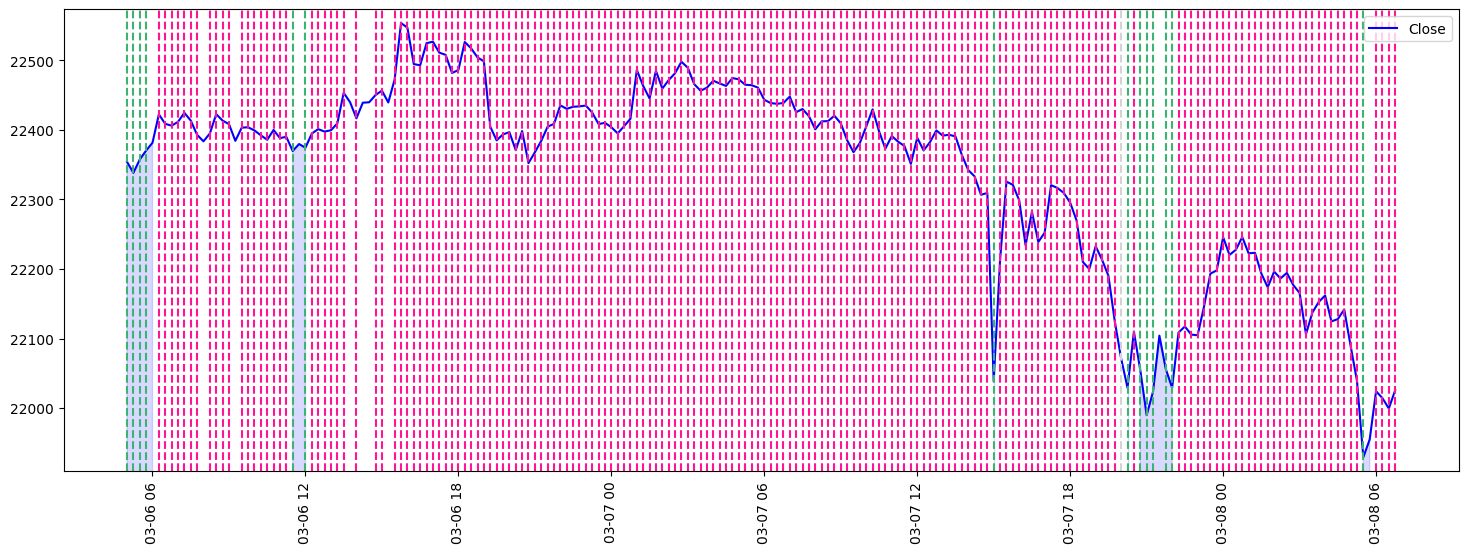

In [123]:
df_v = df.iloc[500:700,:]

import matplotlib.pyplot as plt

# Şekil oluşturma
plt.figure(figsize=(18, 6))

# X ekseni için tarihleri düzgün şekilde görüntülemek için x ekseni etiketlerini dik yapalım
plt.xticks(rotation=90)

# 'In/Out' sütunu 1 ise grafiğin arka planını mediumseagreen rengine boya ve alpha değerini (saydamlık) = 0.1 ver
# Sütun 0 ise, arka planı deeppink rengine boya ve alpha değerini = 0.1 ver



# Grafik çizimi
plt.plot(df_v['timestamp'], df_v['close'], label='Close', color='blue')

y_min = df_v['close'].min() - 20
y_max = df_v['close'].max() + 20

plt.ylim(y_min, y_max)

background_in = df_v['In/Out'] == 1

plt.fill_between(df_v['timestamp'], df_v['close'], where=background_in, color='blue', alpha=0.15)

# Bear, Volatile ve Bull sütunlarını dikkate alarak renkleri ayarlayalım
for i, row in df_v.iterrows():
    if row['Sell'] == 1:
        plt.axvline(x=row['timestamp'], color='deeppink', linestyle='--')
    if row['Stable'] == 1:
        plt.axvline(x=row['timestamp'], color='lightgray', linestyle='--')
    if row['Buy'] == 1:
        plt.axvline(x=row['timestamp'], color='mediumseagreen', linestyle='--')

plt.legend()
plt.show()


In [102]:
df[(df['In/Out'] == 0) & (df['Sell'] == 1)]

,timestamp,open,high,low,close,Sell,Stable,Buy,In/Out
19,2023-03-01 04:45:00,23492.12,23847.00,23490.56,23794.48,1,0,0,0
26,2023-03-01 06:30:00,23729.89,23790.00,23704.26,23776.79,1,0,0,0
27,2023-03-01 06:45:00,23775.98,23803.39,23702.27,23752.75,1,0,0,0
32,2023-03-01 08:00:00,23716.06,23795.00,23681.81,23767.96,1,0,0,0
34,2023-03-01 08:30:00,23735.13,23772.60,23721.81,23757.97,1,0,0,0
...,...,...,...,...,...,...,...,...,...
17622,2023-08-31 14:45:00,27120.90,27192.78,27111.17,27175.66,1,0,0,0
17623,2023-08-31 15:00:00,27175.67,27175.67,27150.00,27174.97,1,0,0,0
17624,2023-08-31 15:15:00,27174.97,27179.74,27125.75,27144.66,1,0,0,0
17625,2023-08-31 15:30:00,27144.66,27149.14,26803.73,26915.71,1,0,0,0


**Bear/Volatile/Bull Value Counts For Fine Tune (through 3 hours looking for %0.5 profit):**

![Alt text](image-1.png)

**Bear/Volatile/Bull Value Counts For Medium Tune (through 8 hours looking for %1 profit)**

In [104]:
df[['Buy', 'Stable', 'Sell']].value_counts()

Buy  Stable  Sell
0    1       0       8701
1    0       0       4610
0    0       1       4316
dtype: int64

In [105]:
from ta.momentum import StochRSIIndicator, RSIIndicator
from ta.volatility import BollingerBands

# TA-Lib kütüphanesini kullanarak Stochastic RSI hesaplayın
rsi_period = 14
stochastic_period = 14
df['rsi'] = RSIIndicator(df['close'], rsi_period).rsi()
df['stochrsi_k'], df['stochrsi_d'] = StochRSIIndicator(df['close'], rsi_period, stochastic_period, stochastic_period).stochrsi_k(), StochRSIIndicator(df['close'], rsi_period, stochastic_period, stochastic_period).stochrsi_d()

# TA-Lib ile Bollinger Bantları hesaplayın
bollinger_period = 20
df['bb_upper'], df['bb_middle'], df['bb_lower'] = BollingerBands(df['close'], bollinger_period).bollinger_hband(), BollingerBands(df['close'], bollinger_period).bollinger_mavg(), BollingerBands(df['close'], bollinger_period).bollinger_lband()

C:\Users\anerg\AppData\Local\Temp\ipykernel_17820\2989772044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = RSIIndicator(df['close'], rsi_period).rsi()
C:\Users\anerg\AppData\Local\Temp\ipykernel_17820\2989772044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stochrsi_k'], df['stochrsi_d'] = StochRSIIndicator(df['close'], rsi_period, stochastic_period, stochastic_period).stochrsi_k(), StochRSIIndicator(df['close'], rsi_period, stochastic_period, stochastic_period).stochrsi_d()
C:\U

In [106]:
df = df.iloc[52:, :]

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,17575.0,27844.814898,2245.081532,19622.770000,26729.950000,28033.830000,29455.535000,31672.950000
high,17575.0,27881.134592,2242.407645,19687.730000,26761.630000,28076.600000,29480.775000,31804.200000
low,17575.0,27806.672181,2247.184861,19549.090000,26694.525000,27987.040000,29436.665000,31632.000000
close,17575.0,27844.997968,2244.875734,19621.660000,26729.980000,28033.820000,29455.540000,31672.950000
Sell,17575.0,0.244324,0.429698,0.000000,0.000000,0.000000,0.000000,1.000000
Stable,17575.0,0.494452,0.499983,0.000000,0.000000,0.000000,1.000000,1.000000
Buy,17575.0,0.261223,0.439314,0.000000,0.000000,0.000000,1.000000,1.000000
In/Out,17575.0,0.527112,0.499279,0.000000,0.000000,1.000000,1.000000,1.000000
rsi,17575.0,49.914620,10.998428,4.480197,43.232732,49.567392,56.110827,94.539467
stochrsi_k,17575.0,0.502181,0.213035,0.011072,0.333306,0.504094,0.673849,0.981831


In [84]:
df.to_csv('binance_api_mediumtune_15min_sRSI-BB.csv', index=False)